In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from matplotlib.colors import LogNorm


gamma_1 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim1_k5_POT1e4_s1_gamma.txt")
gamma_2 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim2_k5_POT1e4_s2_gamma.txt")
gamma_3 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim3_k5_POT1e4_s3_gamma.txt")
gamma_4 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim4_k5_POT1e4_s4_gamma.txt")
gamma_5 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim5_k5_POT1e4_s5_gamma.txt")
gamma_6 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim6_k5_POT1e4_s6_gamma.txt")
gamma_7 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim7_k5_POT1e4_s7_gamma.txt")
gamma_8 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim8_k5_POT1e4_s8_gamma.txt")
gamma_9 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim9_k5_POT1e4_s9_gamma.txt")
gamma_10 = np.genfromtxt("../sharedata/photon_fluxes/DUNE_TargetSim10_k5_POT1e4_s10_gamma.txt")

(28675262, 4)


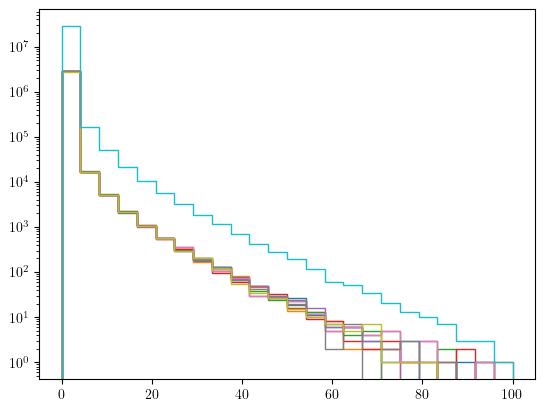

In [22]:
gamma_4vectors_list = [gamma_2, gamma_3, gamma_4, gamma_5, gamma_6, gamma_7, gamma_8, gamma_9, gamma_10]
combined_gamma_4vectors = gamma_1
for dat in gamma_4vectors_list:
    combined_gamma_4vectors = np.append(combined_gamma_4vectors, dat, axis=0)

print(combined_gamma_4vectors.shape)

energy_bins = np.linspace(0.0, 100.0, 25)

plt.hist(gamma_1[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_2[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_3[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_4[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_5[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_6[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_7[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_8[:,3], bins=energy_bins, histtype='step')
plt.hist(gamma_9[:,3], bins=energy_bins, histtype='step')
plt.hist(combined_gamma_4vectors[:,3], bins=energy_bins, histtype='step')
plt.yscale('log')
plt.show()

### get total number of pions per POT at dune

In [3]:
print(combined_gamma_4vectors.shape[0]/1e5)

286.75262


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


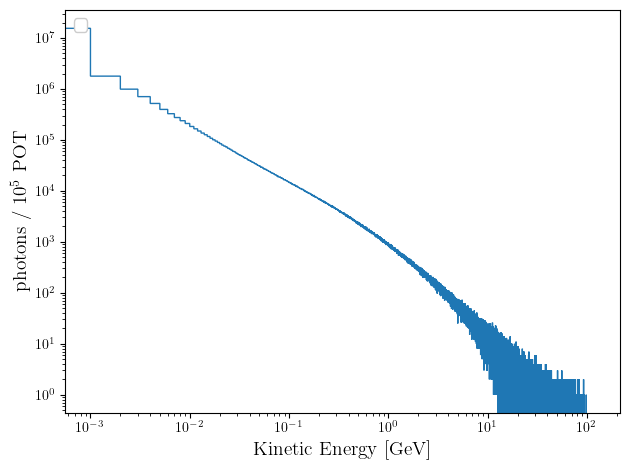

In [23]:
log_ebins = np.logspace(-4, 2, 70)
ebins = np.arange(0, 120.0, 0.001)
plt.hist(combined_gamma_4vectors[:,3], bins=ebins, histtype='step')
plt.ylabel(r"photons / $10^5$ POT", fontsize=14)
plt.xlabel(r"Kinetic Energy [GeV]", fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=12, framealpha=1.0, loc="upper left")
plt.tight_layout()
plt.show()

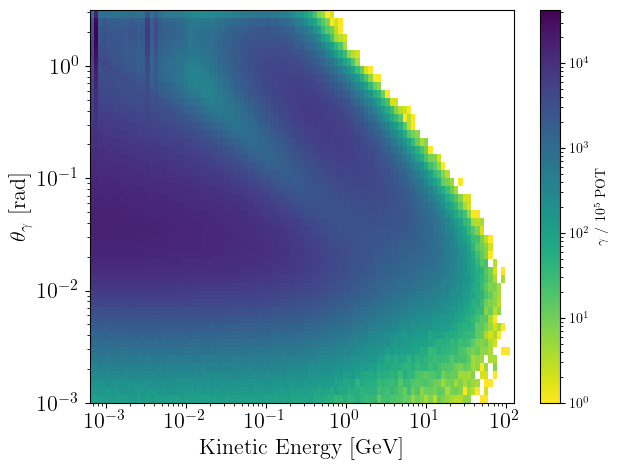

In [24]:
# get the angles wrt lab frame
gamma_theta = np.arccos(combined_gamma_4vectors[:,2] / np.sqrt(combined_gamma_4vectors[:,0]**2 + combined_gamma_4vectors[:,1]**2 + combined_gamma_4vectors[:,2]**2))

log_ebins = np.logspace(-3.2, 2.1, 100)
theta_bins = np.logspace(-3, np.log10(np.pi), 50)


plt.hist2d(combined_gamma_4vectors[:,3], gamma_theta, bins=[log_ebins, theta_bins], norm=LogNorm(), cmap='viridis_r')
plt.ylabel(r"$\theta_{\gamma}$ [rad]", fontsize=16)
plt.xlabel(r"Kinetic Energy [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar(label=r"$\gamma$ / $10^5$ POT")
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()


# Compare to other fluxes

In [25]:
gamma_dune_target_dat = np.genfromtxt("../DUNE/data/photon_flux/geant4_flux_DUNE.txt", delimiter=",")
gamma_dune_sub100mrad = np.genfromtxt("../DUNE/data/photon_flux/DUNE_target_photons_2d_sub100mrad_1e6POT.txt", delimiter=",")


In [16]:
print(combined_gamma_4vectors.shape[0]/1e5)
print(np.sum(gamma_dune_sub100mrad[:,2])/1e6)
print(np.sum(gamma_dune_target_dat[:,2])/1e6)

286.75262
156.224388
120.114383


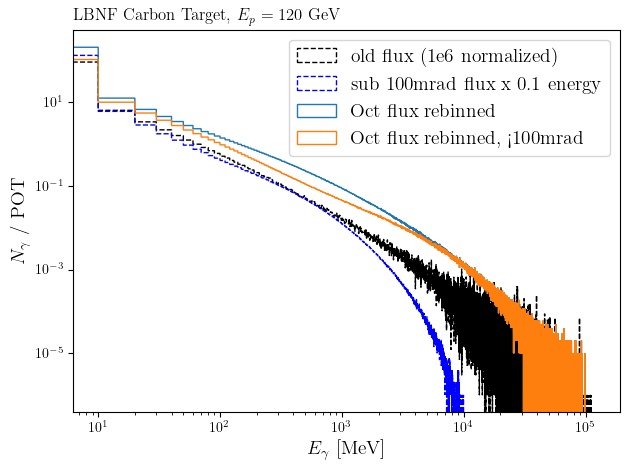

In [32]:
combined_energy_bins = np.arange(0, 120000.0, 10.0)
bin_widths = combined_energy_bins[1:] - combined_energy_bins[:-1]

h, bins = np.histogram(1e3*gamma_dune_target_dat[:,0], weights=gamma_dune_target_dat[:,2]/1e4, bins=combined_energy_bins)

plt.hist(1e3*gamma_dune_target_dat[:,0], weights=gamma_dune_target_dat[:,2]/1e6,
            bins=combined_energy_bins, histtype='step', color='k', ls='dashed', label="old flux (1e6 normalized)")

plt.hist(0.1*gamma_dune_sub100mrad[:,0], weights=gamma_dune_sub100mrad[:,2]/1e6,
            bins=combined_energy_bins, histtype='step', color='b', ls='dashed', label="sub 100mrad flux x 0.1 energy")

plt.hist(combined_gamma_4vectors[:,3]*1e3, weights=np.ones_like(combined_gamma_4vectors[:,3])/1e5, bins=combined_energy_bins, histtype='step', label="Oct flux rebinned")
plt.hist(combined_gamma_4vectors[:,3][gamma_theta<0.1]*1e3, weights=np.ones_like(combined_gamma_4vectors[:,3][gamma_theta<0.1])/1e5, bins=combined_energy_bins, histtype='step', label="Oct flux rebinned, <100mrad")


plt.ylabel(r"$N_\gamma$ / POT", fontsize=14)
plt.xlabel(r"$E_\gamma$ [MeV]", fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.title("LBNF Carbon Target, $E_p = 120$ GeV", loc="left")
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


### dump 2d hist to file: keep only less than 100mrad

In [61]:
log_ebins = np.logspace(-3.2+3, 2.1+3, 100)  # MeV
theta_bins = np.logspace(-3, -1, 50)

h, xedge, yedge = np.histogram2d(combined_gamma_4vectors[:,3]*1e3, gamma_theta, bins=[log_ebins, theta_bins])

ebin_centers = (log_ebins[1:] + log_ebins[:-1])/2
thetabin_centers = (theta_bins[1:] + theta_bins[:-1])/2

h_flattened = h.flatten()
energy_edges_flat = xedge.flatten()
theta_edges_flat = yedge.flatten()


In [73]:
print(theta_edges_flat.shape)
print(energy_edges_flat.shape)
print(h_flattened.shape)

# each row is an energy bin
# each column is an angle bin
print(h[:,0].shape)

ANGLE, ENRG = np.meshgrid(thetabin_centers, ebin_centers)
energy_bins_flat = ENRG.flatten()
angle_bins_flat = ANGLE.flatten()

print(angle_bins_flat.shape)

out_flux_array = np.array([energy_bins_flat, angle_bins_flat, h_flattened]).transpose()

np.savetxt("data/fluxes/dune_target_gamma_1e5POT_2d_sub100mrad_june24.txt", out_flux_array)

print(out_flux_array)

(50,)
(100,)
(4851,)
(99,)
(4851,)
[[6.72344824e-01 1.04927057e-03 5.40000000e+01]
 [6.72344824e-01 1.15266689e-03 6.50000000e+01]
 [6.72344824e-01 1.26625200e-03 6.30000000e+01]
 ...
 [1.18592360e+05 7.91477390e-02 0.00000000e+00]
 [1.18592360e+05 8.69470475e-02 0.00000000e+00]
 [1.18592360e+05 9.55149089e-02 0.00000000e+00]]


### validate flattend flux

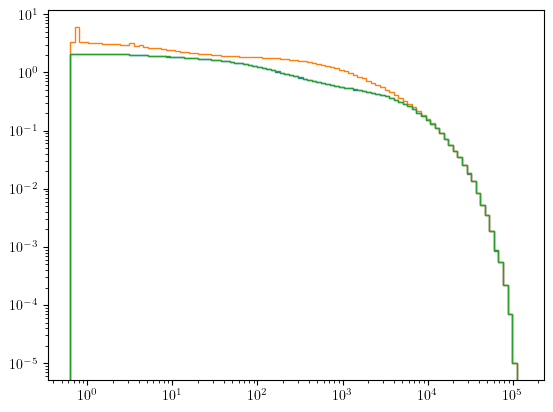

99.10611999999999


In [72]:
plt.hist(out_flux_array[:,0], weights=out_flux_array[:,2]/1e5, bins=log_ebins, histtype='step')
plt.hist(combined_gamma_4vectors[:,3]*1e3, weights=np.ones_like(combined_gamma_4vectors[:,3])/1e5, bins=log_ebins, histtype='step', label="Oct flux rebinned")
plt.hist(combined_gamma_4vectors[:,3][gamma_theta<0.1]*1e3, weights=np.ones_like(combined_gamma_4vectors[:,3][gamma_theta<0.1])/1e5,
         bins=log_ebins, histtype='step', label="Oct flux rebinned, <100mrad")

plt.yscale('log')
plt.xscale('log')
plt.show()

print(np.sum(out_flux_array[:,2]/1e5))

# plot the electron positron fluxes

In [26]:
gamma_dune_target_dat = np.genfromtxt("../DUNE/data/photon_flux/geant4_flux_DUNE.txt", delimiter=",")
e_dune_target_dat = np.genfromtxt("../DUNE/data/rootfiles/hElectron_20210621_TargetSim_QGSP_BIC_AllHP_POT1E6.txt")
p_dune_target_dat = np.genfromtxt("../DUNE/data/rootfiles/hPositron_20210621_TargetSim_QGSP_BIC_AllHP_POT1E6.txt")
gamma_dune_sub100mrad = np.genfromtxt("../DUNE/data/photon_flux/DUNE_target_photons_2d_sub100mrad_1e6POT.txt", delimiter=",")
gamma_dune_sub100mrad_2 = np.genfromtxt("../DUNE/data/photon_flux/DUNE_target_photons_2d_sub100mrad_v2.txt", delimiter=",")

pot_dune_target = 1e6

[1.000000e-04 9.998725e-04 1.999745e-03 ... 3.139590e+00 3.140590e+00
 3.141590e+00]


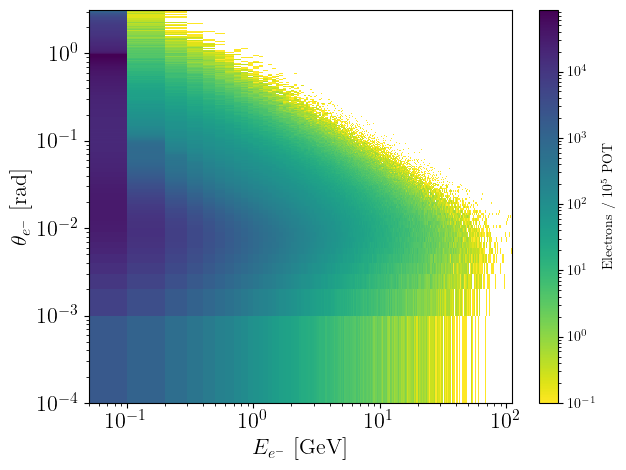

In [27]:
# Get angle bins for DUNE target photon flux
numi_target_angle_centers = np.unique(e_dune_target_dat[:,1])
numi_target_angle_widths = numi_target_angle_centers[1:]-numi_target_angle_centers[:-1]
numi_target_angle_widths = np.append(numi_target_angle_widths[0], numi_target_angle_widths)
numi_target_angle_widths = np.append(numi_target_angle_widths, numi_target_angle_widths[-1])
numi_target_angle_edges = np.append(0.0, numi_target_angle_centers) + numi_target_angle_widths/2
numi_target_angle_edges[0] = 1e-4

numi_target_energy_centers = np.unique(e_dune_target_dat[:,0])
numi_target_energy_widths = numi_target_energy_centers[1:]-numi_target_energy_centers[:-1]
numi_target_energy_widths = np.append(numi_target_energy_widths[0], numi_target_energy_widths)
numi_target_energy_widths = np.append(numi_target_energy_widths, numi_target_energy_widths[-1])
numi_target_energy_edges = np.append(0.0, numi_target_energy_centers) + numi_target_energy_widths/2


print(numi_target_angle_edges)

# Plot per 1e5 POT (so divide wgts by 10)
plt.hist2d(e_dune_target_dat[:,0], e_dune_target_dat[:,1], weights=e_dune_target_dat[:,2]/10,
            bins=[numi_target_energy_edges,numi_target_angle_edges], norm=LogNorm(), cmap='viridis_r')
plt.ylabel(r"$\theta_{e^-}$ [rad]", fontsize=16)
plt.xlabel(r"$E_{e^-}$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar(label="Electrons / $10^5$ POT")
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.savefig("plots/geant_fluxes/dune_target_electron_flux_2d.png")
plt.show()

[1.000000e-04 9.998725e-04 1.999745e-03 ... 3.138590e+00 3.139590e+00
 3.140590e+00]


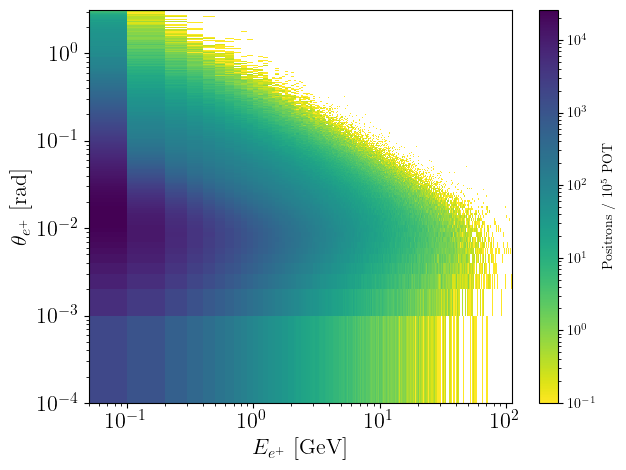

In [8]:
# Get angle bins for DUNE target photon flux
numi_target_angle_centers = np.unique(p_dune_target_dat[:,1])
numi_target_angle_widths = numi_target_angle_centers[1:]-numi_target_angle_centers[:-1]
numi_target_angle_widths = np.append(numi_target_angle_widths[0], numi_target_angle_widths)
numi_target_angle_widths = np.append(numi_target_angle_widths, numi_target_angle_widths[-1])
numi_target_angle_edges = np.append(0.0, numi_target_angle_centers) + numi_target_angle_widths/2
numi_target_angle_edges[0] = 1e-4

numi_target_energy_centers = np.unique(p_dune_target_dat[:,0])
numi_target_energy_widths = numi_target_energy_centers[1:]-numi_target_energy_centers[:-1]
numi_target_energy_widths = np.append(numi_target_energy_widths[0], numi_target_energy_widths)
numi_target_energy_widths = np.append(numi_target_energy_widths, numi_target_energy_widths[-1])
numi_target_energy_edges = np.append(0.0, numi_target_energy_centers) + numi_target_energy_widths/2


print(numi_target_angle_edges)

plt.hist2d(p_dune_target_dat[:,0], p_dune_target_dat[:,1], weights=p_dune_target_dat[:,2]/10,
            bins=[numi_target_energy_edges,numi_target_angle_edges], norm=LogNorm(), cmap='viridis_r')
plt.ylabel(r"$\theta_{e^+}$ [rad]", fontsize=16)
plt.xlabel(r"$E_{e^+}$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar(label="Positrons / $10^5$ POT")
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.savefig("plots/geant_fluxes/dune_target_positrons_flux_2d.png")
plt.show()

### 1d fluxes

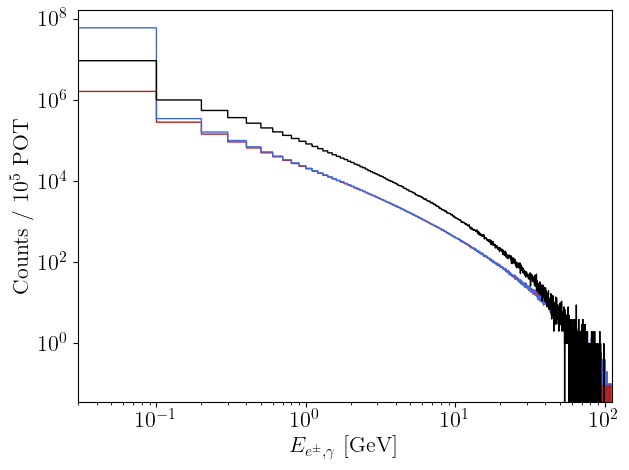

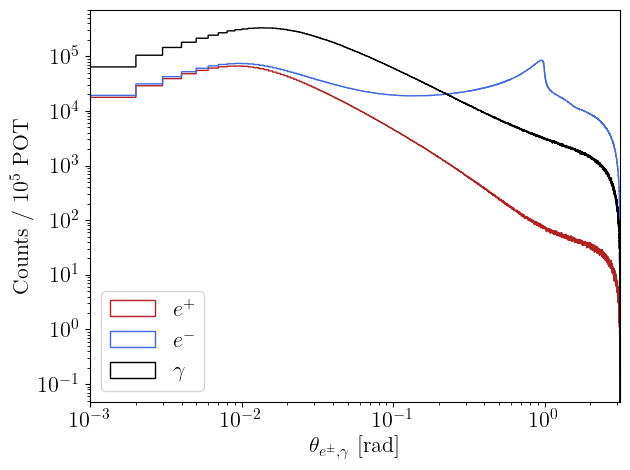

In [28]:
h1d_lt = 1.0

#energy_bins_1d = numi_target_energy_edges  # log_ebins
energy_bins_1d = np.append(1e-3, np.delete(numi_target_energy_edges, 0)) # log_ebins
theta_bins_1d = numi_target_angle_edges  # theta_bins

plt.hist(p_dune_target_dat[:,0], weights=p_dune_target_dat[:,2]/10, bins=energy_bins_1d, histtype='step', color='firebrick', linewidth=h1d_lt)
plt.hist(e_dune_target_dat[:,0], weights=e_dune_target_dat[:,2]/10, bins=energy_bins_1d,  histtype='step', color='royalblue', linewidth=h1d_lt)
plt.hist(combined_gamma_4vectors[:,3], bins=energy_bins_1d, histtype='step', linewidth=h1d_lt, color='k')
plt.ylabel(r"Counts / $10^5$ POT", fontsize=16)
plt.xlabel(r"$E_{e^\pm, \gamma}$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.xlim((30.0e-3, energy_bins_1d[-1]))
plt.tight_layout()
plt.savefig("plots/geant_fluxes/dune_target_fluxes_1d_energy.pdf")
plt.show()
plt.close()


plt.hist(p_dune_target_dat[:,1], weights=p_dune_target_dat[:,2]/10, bins=theta_bins_1d, histtype='step', color='firebrick', linewidth=h1d_lt, label=r"$e^+$")
plt.hist(e_dune_target_dat[:,1], weights=e_dune_target_dat[:,2]/10, bins=theta_bins_1d, histtype='step', color='royalblue', linewidth=h1d_lt, label=r"$e^-$")
plt.hist(gamma_theta, bins=theta_bins_1d, histtype='step', color='k', linewidth=h1d_lt, label=r"$\gamma$")
plt.ylabel(r"Counts / $10^5$ POT", fontsize=16)
plt.xlabel(r"$\theta_{e^\pm, \gamma}$ [rad]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=16, loc="lower left")
plt.xlim((theta_bins_1d[1], theta_bins_1d[-1]))
plt.tight_layout()
plt.savefig("plots/geant_fluxes/dune_target_fluxes_1d_thetas.pdf")
plt.show()


# Import new 4-vector e+/e-

binning first!
On i = 0


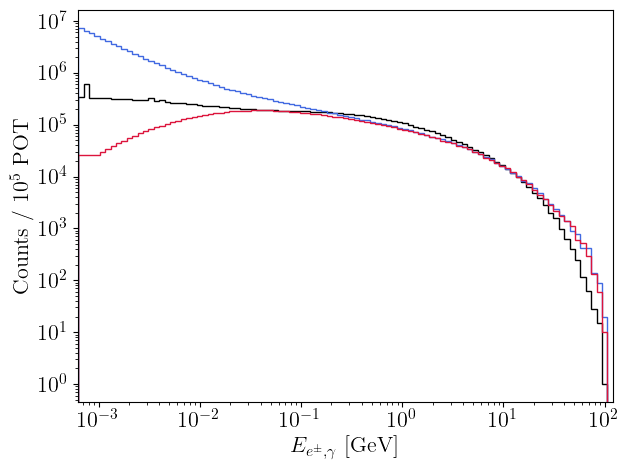

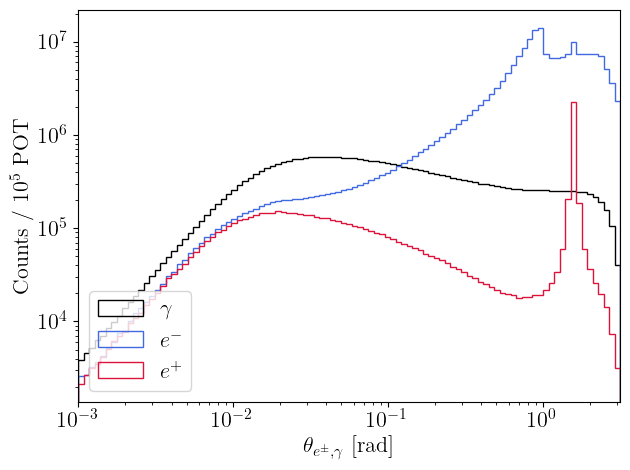

In [34]:
# Specify the start row and the number of rows to read
start_row = 100  # Starting row index
rows_to_read = 50  # Number of rows to read

# Load the subset of data (LINUX laptop)
el_lines = 64490340
pos_lines = 2836314

el_partitions = np.arange(0, el_lines + int(el_lines/10), int(el_lines/10))
pos_partitions = np.arange(0, pos_lines + int(pos_lines/10), int(pos_lines/10))


electron_path = "C:/physics_data/electrons_POT1e5.txt"  # desktop
positron_path = "C:/physics_data/positrons_POT1e5.txt"  # desktop

pot_per_epem_sample = 1e5

# "/home/thompson/Desktop/electrons_POT1e5.txt"

log_ebins = np.logspace(-3.2, np.log10(120.0), 100)
#log_ebins = energy_bins_1d
log_ebin_centers = (log_ebins[1:] + log_ebins[:-1])/2
theta_bins = np.logspace(-3, np.log10(np.pi), 100)
theta_bin_centers = (theta_bins[1:] + theta_bins[:-1])/2


print("binning first!")
electron_4vectors = np.genfromtxt(electron_path,
                                    skip_header=el_partitions[0],
                                    max_rows=el_partitions[1])
positron_4vectors = np.genfromtxt(positron_path,
                                    skip_header=pos_partitions[0],
                                    max_rows=pos_partitions[1])

#electron_4vectors *= 1.0e3  # TeV --> GeV??

theta_el = np.arccos(electron_4vectors[:,2] \
            / np.sqrt(electron_4vectors[:,0]**2 + electron_4vectors[:,1]**2 + electron_4vectors[:,2]**2))
theta_pos = np.arccos(positron_4vectors[:,2] \
            / np.sqrt(positron_4vectors[:,0]**2 + positron_4vectors[:,1]**2 + positron_4vectors[:,2]**2))

# bin into histogram
total_h_e_el, _ = np.histogram(electron_4vectors[:,0], bins=log_ebins)
total_h_theta_el, _ = np.histogram(theta_el, bins=theta_bins)

total_h_e_pos, _ = np.histogram(positron_4vectors[:,0], bins=log_ebins)
total_h_theta_pos, _ = np.histogram(theta_pos, bins=theta_bins)

#total_h2, _ = np.histogram2d(electron_4vectors[:,0], theta, bins=[log_ebins, theta_bins])

# Loop over file partitions
for i in range(el_partitions.shape[0]-2):
    if i >= 1:
        continue
    print("On i = {}".format(i))
    electron_4vectors = np.genfromtxt(electron_path,
                                        skip_header=el_partitions[i+1],
                                        max_rows=el_partitions[i+2])
    positron_4vectors = np.genfromtxt(positron_path,
                                    skip_header=pos_partitions[i+1],
                                    max_rows=pos_partitions[i+2])
    #electron_4vectors *= 1.0e3
    
    theta_el = np.arccos(electron_4vectors[:,3] \
            / np.sqrt(electron_4vectors[:,1]**2 + electron_4vectors[:,2]**2 + electron_4vectors[:,3]**2))
    theta_pos = np.arccos(positron_4vectors[:,3] \
            / np.sqrt(positron_4vectors[:,1]**2 + positron_4vectors[:,2]**2 + positron_4vectors[:,3]**2))

    # bin into histogram
    h_e_el, _ = np.histogram(electron_4vectors[:,0], bins=log_ebins)
    h_theta_el, _ = np.histogram(theta_el, bins=theta_bins)
    #h2, _ = np.histogram2d(electron_4vectors[:,0], theta, bins=[log_ebins, theta_bins])

    h_e_pos, _ = np.histogram(positron_4vectors[:,0], bins=log_ebins)
    h_theta_pos, _ = np.histogram(theta_pos, bins=theta_bins)
    
    total_h_e_el += h_e_el
    total_h_theta_el += h_theta_el

    total_h_e_pos += h_e_pos
    total_h_theta_pos += h_theta_pos
    #total_h2 += h2
    
    del(electron_4vectors)
    del(positron_4vectors)


h1d_lt = 1.0
rescale_factor = 10

plt.hist(combined_gamma_4vectors[:,3], bins=log_ebins, histtype='step', linewidth=h1d_lt, color='k')
plt.hist(log_ebin_centers, weights=total_h_e_el*rescale_factor, bins=log_ebins, histtype='step',
         color='royalblue', linewidth=h1d_lt)
plt.hist(log_ebin_centers, weights=total_h_e_pos*rescale_factor, bins=log_ebins, histtype='step',
         color='crimson', linewidth=h1d_lt)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"Counts / $10^5$ POT", fontsize=16)
plt.xlabel(r"$E_{e^\pm, \gamma}$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim((log_ebins[0], log_ebins[-1]))
plt.tight_layout()
plt.show()


plt.hist(gamma_theta, bins=theta_bins, histtype='step', color='k', linewidth=h1d_lt, label=r"$\gamma$")
plt.hist(theta_bin_centers, weights=total_h_theta_el*rescale_factor, bins=theta_bins, histtype='step',
         label=r"$e^-$",color='royalblue', linewidth=h1d_lt)
plt.hist(theta_bin_centers, weights=total_h_theta_pos*rescale_factor, bins=theta_bins, histtype='step',
         label=r"$e^+$", color='crimson', linewidth=h1d_lt)
plt.ylabel(r"Counts / $10^5$ POT", fontsize=16)
plt.xlabel(r"$\theta_{e^\pm, \gamma}$ [rad]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=16, loc="lower left")
plt.xlim((theta_bins_1d[1], theta_bins_1d[-1]))
plt.tight_layout()
plt.show()





binning first!
On i = 0
On i = 1
On i = 2
On i = 3
On i = 4
On i = 5
On i = 6
On i = 7
On i = 8


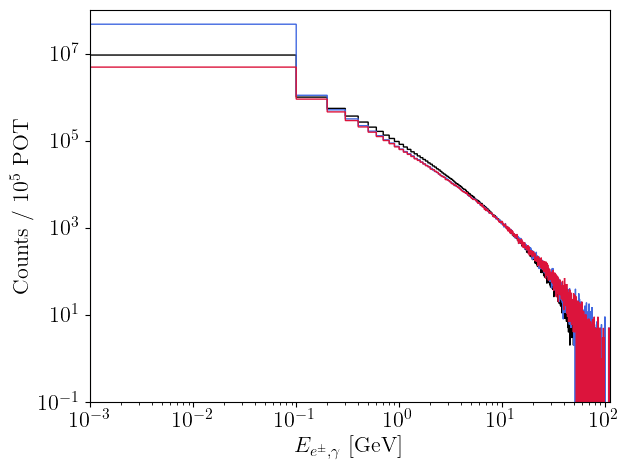

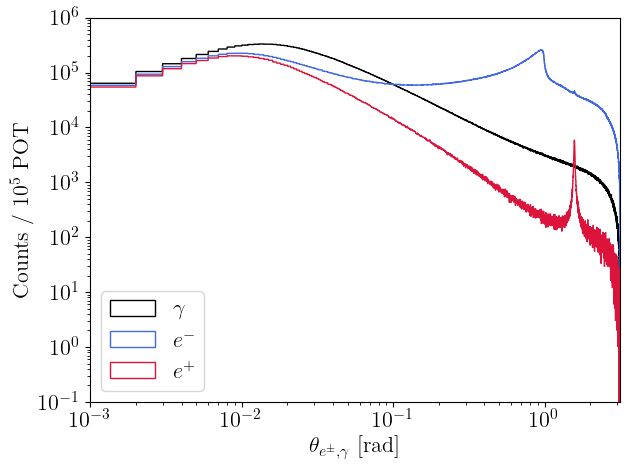

In [37]:
# Specify the start row and the number of rows to read
start_row = 100  # Starting row index
rows_to_read = 50  # Number of rows to read

# Load the subset of data (LINUX laptop)
el_lines = 64490340
pos_lines = 2836314

el_partitions = np.arange(0, el_lines + int(el_lines/10), int(el_lines/10))
pos_partitions = np.arange(0, pos_lines + int(pos_lines/10), int(pos_lines/10))


electron_path = "C:/physics_data/electrons_POT1e5.txt"  # desktop
positron_path = "C:/physics_data/positrons_POT1e5.txt"  # desktop

pot_per_epem_sample = 1e5

# "/home/thompson/Desktop/electrons_POT1e5.txt"

#log_ebins = np.logspace(-3.2, np.log10(120.0), 100)
log_ebins = energy_bins_1d
log_ebin_centers = (log_ebins[1:] + log_ebins[:-1])/2
theta_bins = theta_bins_1d #np.linspace(1e-3, np.pi, 200)
theta_bin_centers = (theta_bins[1:] + theta_bins[:-1])/2


print("binning first!")
electron_4vectors = np.genfromtxt(electron_path,
                                    skip_header=el_partitions[0],
                                    max_rows=el_partitions[1])
positron_4vectors = np.genfromtxt(positron_path,
                                    skip_header=pos_partitions[0],
                                    max_rows=pos_partitions[1])

#electron_4vectors *= 1.0e3  # TeV --> GeV??

theta_el = np.arccos(electron_4vectors[:,2] \
            / np.sqrt(electron_4vectors[:,0]**2 + electron_4vectors[:,1]**2 + electron_4vectors[:,2]**2))
theta_pos = np.arccos(positron_4vectors[:,2] \
            / np.sqrt(positron_4vectors[:,0]**2 + positron_4vectors[:,1]**2 + positron_4vectors[:,2]**2))

# bin into histogram
total_h_e_el, _ = np.histogram(electron_4vectors[:,0], bins=log_ebins)
total_h_theta_el, _ = np.histogram(theta_el, bins=theta_bins)

total_h_e_pos, _ = np.histogram(positron_4vectors[:,0], bins=log_ebins)
total_h_theta_pos, _ = np.histogram(theta_pos, bins=theta_bins)

#total_h2, _ = np.histogram2d(electron_4vectors[:,0], theta, bins=[log_ebins, theta_bins])

# Loop over file partitions
for i in range(el_partitions.shape[0]-2):
    #if i >= 1:
    #    continue
    print("On i = {}".format(i))
    electron_4vectors = np.genfromtxt(electron_path,
                                        skip_header=el_partitions[i+1],
                                        max_rows=el_partitions[i+2])
    positron_4vectors = np.genfromtxt(positron_path,
                                    skip_header=pos_partitions[i+1],
                                    max_rows=pos_partitions[i+2])
    #electron_4vectors *= 1.0e3
    
    theta_el = np.arccos(electron_4vectors[:,3] \
            / np.sqrt(electron_4vectors[:,1]**2 + electron_4vectors[:,2]**2 + electron_4vectors[:,3]**2))
    theta_pos = np.arccos(positron_4vectors[:,3] \
            / np.sqrt(positron_4vectors[:,1]**2 + positron_4vectors[:,2]**2 + positron_4vectors[:,3]**2))

    # bin into histogram
    h_e_el, _ = np.histogram(electron_4vectors[:,0], bins=log_ebins)
    h_theta_el, _ = np.histogram(theta_el, bins=theta_bins)
    #h2, _ = np.histogram2d(electron_4vectors[:,0], theta, bins=[log_ebins, theta_bins])

    h_e_pos, _ = np.histogram(positron_4vectors[:,0], bins=log_ebins)
    h_theta_pos, _ = np.histogram(theta_pos, bins=theta_bins)
    
    total_h_e_el += h_e_el
    total_h_theta_el += h_theta_el

    total_h_e_pos += h_e_pos
    total_h_theta_pos += h_theta_pos
    #total_h2 += h2
    
    del(electron_4vectors)
    del(positron_4vectors)


h1d_lt = 1.0
rescale_factor = 1

plt.hist(combined_gamma_4vectors[:,3], bins=log_ebins, histtype='step', linewidth=h1d_lt, color='k')
plt.hist(log_ebin_centers, weights=total_h_e_el*rescale_factor, bins=log_ebins, histtype='step',
         color='royalblue', linewidth=h1d_lt)
plt.hist(log_ebin_centers, weights=total_h_e_pos*rescale_factor, bins=log_ebins, histtype='step',
         color='crimson', linewidth=h1d_lt)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"Counts / $10^5$ POT", fontsize=16)
plt.xlabel(r"$E_{e^\pm, \gamma}$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim((log_ebins[0], log_ebins[-1]))
plt.ylim((1e-1, 1e8))
plt.tight_layout()
plt.show()


plt.hist(gamma_theta, bins=theta_bins, histtype='step', color='k', linewidth=h1d_lt, label=r"$\gamma$")
plt.hist(theta_bin_centers, weights=total_h_theta_el*rescale_factor, bins=theta_bins, histtype='step',
         label=r"$e^-$",color='royalblue', linewidth=h1d_lt)
plt.hist(theta_bin_centers, weights=total_h_theta_pos*rescale_factor, bins=theta_bins, histtype='step',
         label=r"$e^+$", color='crimson', linewidth=h1d_lt)
plt.ylabel(r"Counts / $10^5$ POT", fontsize=16)
plt.xlabel(r"$\theta_{e^\pm, \gamma}$ [rad]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=16, loc="lower left")
plt.xlim((theta_bins_1d[1], theta_bins_1d[-1]))
plt.ylim((1e-1, 1e6))
plt.tight_layout()
plt.show()



